In [1]:
%pip install numpy pandas seaborn matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [3]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


# TLT ticker 

In [4]:
tlt_monthly_returns = pd.read_csv('../macro_data/tlt_monthly_returns.csv', index_col=0)

tlt_monthly_returns.index = pd.to_datetime(tlt_monthly_returns.index, format='%Y-%m')


In [5]:
start_date = goyal_welch_data.index.min() if goyal_welch_data.index.min() > tlt_monthly_returns.index.min() else tlt_monthly_returns.index.min()
end_date = goyal_welch_data.index.max() if goyal_welch_data.index.max() < tlt_monthly_returns.index.max() else tlt_monthly_returns.index.max()

start_date, end_date

(Timestamp('2002-08-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))

In [6]:
filtered_spy_monthly_returns = tlt_monthly_returns.loc[start_date:end_date]
filtered_goyal_welch_data = goyal_welch_data.loc[start_date:end_date]

filtered_goyal_welch_data['excess_returns'] = tlt_monthly_returns['TLT'] - filtered_goyal_welch_data['Rfree']

filtered_goyal_welch_data['excess_returns']

/tmp/ipykernel_5032/2051868635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goyal_welch_data['excess_returns'] = tlt_monthly_returns['TLT'] - filtered_goyal_welch_data['Rfree']


yyyymm
2002-08-01    0.053730
2002-09-01    0.041193
2002-10-01   -0.038345
2002-11-01   -0.010361
2002-12-01    0.044155
                ...   
2022-08-01   -0.047431
2022-09-01   -0.084251
2022-10-01   -0.061944
2022-11-01    0.068611
2022-12-01   -0.029500
Name: excess_returns, Length: 245, dtype: float64

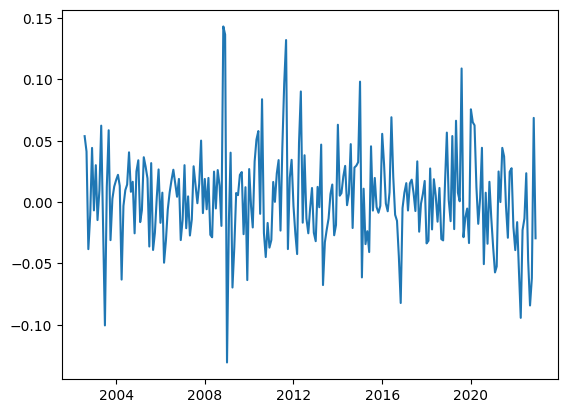

In [7]:
plt.plot(filtered_goyal_welch_data['excess_returns'])

Text(0.5, 1.0, 'leverage = 0.6')

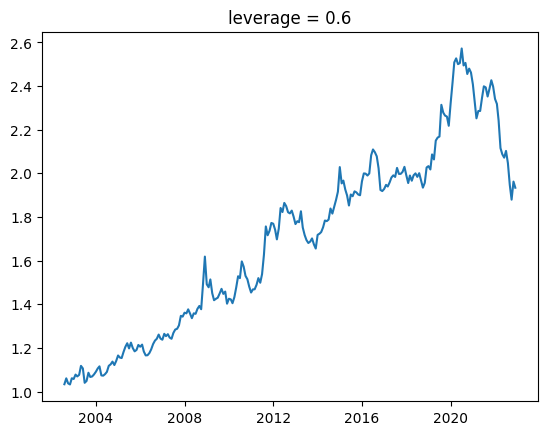

In [8]:
leverage = 0.6
strategy_returns = 1 + filtered_goyal_welch_data.Rfree + leverage * filtered_goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [9]:
cleaned_data = filtered_goyal_welch_data.drop(columns=['csp']).fillna(0)

In [10]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
2002-08-01  0.000000  0.000000  0.000000  0.284412  0.0162  0.0637  0.0758   
2002-09-01  0.889987  0.994962  1.038010  0.324555  0.0163  0.0615  0.0740   
2002-10-01  1.086436  1.005804  0.972813  0.293437  0.0158  0.0632  0.0773   
2002-11-01  1.057070  1.005764  0.972057  0.276975  0.0123  0.0631  0.0762   
2002-12-01  0.939667  1.005738  0.971250  0.295386  0.0119  0.0621  0.0745   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

In [11]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((245, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

In [12]:
data_for_signals

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar
yyyymm,,,,,,,,,,,,,,
2002-08-01,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000
2002-09-01,0.000000,0.000000,0.000000,0.284412,0.0162,0.0637,0.0758,0.0510,0.024748,0.0014,0.000000,0.0464,0.0452,0.009409
2002-10-01,0.889987,0.994962,1.038010,0.324555,0.0163,0.0615,0.0740,0.0480,0.029299,0.0014,0.003331,0.0417,0.0330,0.007366
2002-11-01,1.086436,1.005804,0.972813,0.293437,0.0158,0.0632,0.0773,0.0508,0.025671,0.0014,0.001660,-0.0294,-0.0240,0.011590
2002-12-01,1.057070,1.005764,0.972057,0.276975,0.0123,0.0631,0.0762,0.0521,0.022908,0.0012,0.001657,-0.0122,0.0130,0.004449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1.091116,1.006762,0.991019,0.218187,0.0223,0.0406,0.0521,0.0290,-0.006121,0.0008,0.013736,0.0270,0.0324,0.003188
2022-09-01,0.957560,1.006717,0.990938,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000118,-0.0421,-0.0293,0.003349
2022-10-01,0.906604,1.006672,0.990855,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,-0.000354,-0.0769,-0.0526,0.004934


In [13]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], use_std=False)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2012-10-01     -0.008897     -0.008776     -0.007823     -0.003822   
2012-11-01      0.009440      0.009154      0.007100      0.000314   
2012-12-01      0.002860      0.002502      0.000399     -0.002871   
2013-01-01      0.007128      0.006231      0.000647     -0.010320   
2013-02-01      0.007268      0.006676      0.003030     -0.004125   
...                  ...           ...           ...           ...   
2022-08-01      0.000885      0.000816      0.001255      0.008188   
2022-09-01     -0.011212     -0.011750     -0.014402     -0.013258   
2022-10-01      0.015639      0.014598      0.008528     -0.001146   
2022-11-01      0.004331      0.003525     -0.000599     -0.001968   
2022-12-01     -0.003154     -0.003521     -0.005322     -0.005295   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [14]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,-0.076227,-0.077207,-0.080115,-0.053932,-0.017481,-0.002634,0.000505,0.000138,1.561460e-05,1.580887e-06
D12,0.088477,0.089744,0.094067,0.064580,0.012173,0.001459,0.001093,0.000215,2.357718e-05,2.380958e-06
E12,-0.113129,-0.112348,-0.105979,-0.073634,-0.025829,-0.004274,-0.000463,-0.000046,-4.529138e-06,-4.526557e-07
b/m,0.063899,0.062667,0.053383,0.018458,-0.001083,0.000079,0.000495,0.000098,1.069678e-05,1.080016e-06
tbl,0.065753,0.063788,0.051964,0.023068,-0.003486,-0.004611,-0.001416,-0.000202,-2.122422e-05,-2.133969e-06
AAA,0.385204,0.366158,0.252322,0.064213,0.019380,0.005926,0.001338,0.000205,2.197729e-05,2.213483e-06
BAA,-0.502667,-0.486819,-0.385360,-0.143095,-0.014266,0.001549,0.000662,0.000111,1.201212e-05,1.210983e-06
lty,0.039933,0.045789,0.076111,0.075032,0.025340,0.006462,0.001294,0.000195,2.077024e-05,2.091522e-06
ntis,-0.046810,-0.045497,-0.036520,-0.009795,0.002275,0.000967,0.000434,0.000076,8.278253e-06,8.349084e-07
Rfree,-0.111230,-0.109009,-0.094980,-0.054607,-0.015767,-0.005475,-0.001510,-0.000214,-2.254736e-05,-2.267044e-06


In [15]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2012-10-01      0.000044      0.000043      0.000039      0.000019   
2012-11-01      0.000108      0.000105      0.000082      0.000004   
2012-12-01     -0.000071     -0.000063     -0.000010      0.000072   
2013-01-01     -0.000227     -0.000198     -0.000021      0.000329   
2013-02-01      0.000090      0.000083      0.000038     -0.000051   
...                  ...           ...           ...           ...   
2022-08-01     -0.000042     -0.000039     -0.000060     -0.000388   
2022-09-01      0.000945      0.000990      0.001213      0.001117   
2022-10-01     -0.000969     -0.000904     -0.000528      0.000071   
2022-11-01      0.000297      0.000242     -0.000041     -0.000135   
2022-12-01      0.000093      0.000104      0.000157      0.000156   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [16]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [17]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)

Text(0.5, 1.0, 'SR=[ 0.03 -0.04 -0.03  0.01  0.08  0.08  0.04  0.02  0.03  0.03  0.03]')

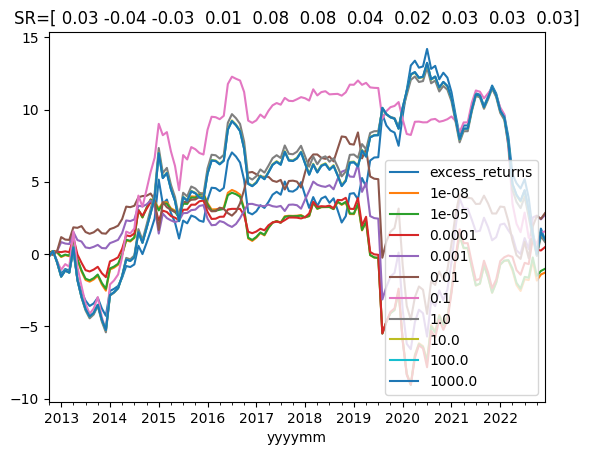

In [18]:
tmp.cumsum().plot()
plt.title(f'SR={sr.values.flatten()}')

In [19]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const             -0.0
excess_returns    10.5
Name: z, dtype: float64


In [20]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [21]:
random_features.shape

(245, 100000)

In [22]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2012-10-01      0.002365      0.000184     -0.002923      0.009321   
2012-11-01     -0.054555     -0.059772     -0.063268     -0.017491   
2012-12-01      0.037318      0.032036      0.015839      0.023872   
2013-01-01      0.086177      0.073246      0.023241     -0.016523   
2013-02-01      0.126981      0.117855      0.064884     -0.001821   
...                  ...           ...           ...           ...   
2022-08-01      0.153280      0.175566      0.195988      0.170251   
2022-09-01     -0.244778     -0.231938     -0.240755     -0.296252   
2022-10-01     -0.047946     -0.029544     -0.037483     -0.153177   
2022-11-01     -0.012070      0.009159      0.035682     -0.037582   
2022-12-01     -0.169286     -0.137362     -0.047730     -0.025236   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

Text(0.5, 1.0, 'sr=excess_returns    0.03\n0.0              -0.04\n0.00001          -0.03\n0.0001            0.01\n0.001             0.08\n0.01              0.08\n0.1               0.04\n1.0               0.02\n10.0              0.03\n100.0             0.03\n1000.0            0.03\n1e-08_complex     0.04\n1e-05_complex     0.02\n0.0001_complex   -0.00\n0.001_complex    -0.06\n0.01_complex     -0.17\n0.1_complex      -0.22\n1.0_complex      -0.31\n10.0_complex     -0.26\n100.0_complex    -0.07\n1000.0_complex    0.01\nmean             -0.06\ndtype: float64')

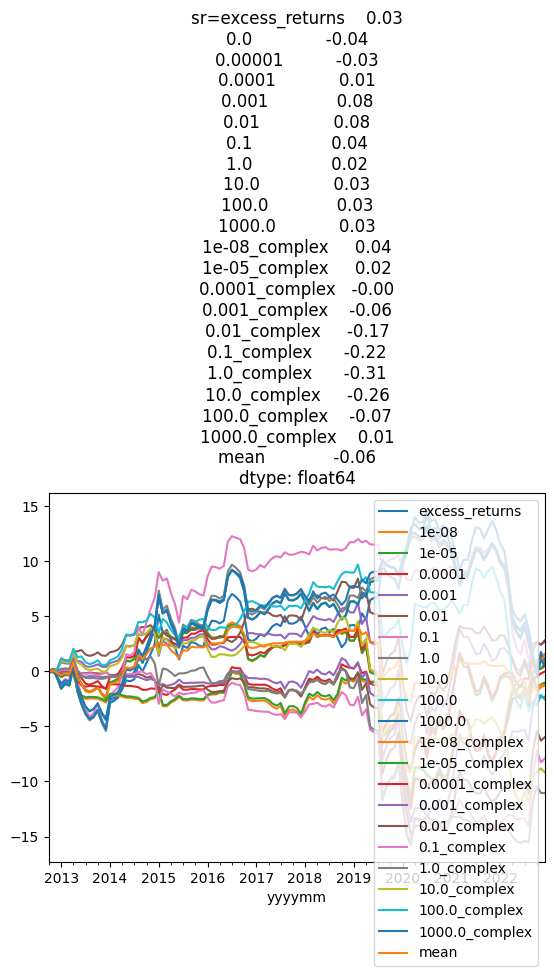

In [23]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'sr={sr}')
#plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))

In [24]:
cleaned_data.corr()[0.01]

Index             0.245029
D12              -0.160981
E12               0.284735
b/m               0.037523
tbl              -0.086774
AAA               0.049455
BAA               0.045533
lty               0.064496
ntis              0.018107
Rfree            -0.122321
infl             -0.037642
ltr              -0.558409
corpr            -0.507785
svar             -0.106265
CRSP_SPvw         0.244822
CRSP_SPvwx        0.245935
excess_returns   -0.587926
0.0               0.779963
0.00001           0.793308
0.0001            0.861417
0.001             0.970194
0.01              1.000000
0.1               0.236363
1.0              -0.381757
10.0             -0.431305
100.0            -0.436272
1000.0           -0.436770
1e-08_complex     0.601872
1e-05_complex     0.622612
0.0001_complex    0.725184
0.001_complex     0.830420
0.01_complex      0.855581
0.1_complex       0.777472
1.0_complex       0.813324
10.0_complex      0.836362
100.0_complex     0.654408
1000.0_complex   -0.290386
N

In [25]:
tstats = regression_with_tstats(predicted_variable=tmp['0.01_complex'], explanatory_variables=tmp[['excess_returns', 0.01]])
print(tstats)

const            -1.3
excess_returns   -1.6
0.01              6.2
Name: z, dtype: float64
